<a href="https://colab.research.google.com/github/adnanraghib1308/MNIST-data-set-Classification-using-Neural-Network/blob/master/MNIST_using_keras(various_model_check).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import time

#This function is used to update the plots for each epoch and error.
def plot_dynamic(x, vy, ty, ax, colors=['b']):
  ax.plot(x, vy,'b',label='Test Loss')
  ax.plot(x, ty,'r',label='Train loss')
  plt.legend()
  plt.grid()
  fig.canvas.draw()

In [0]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
print("Number of training examples: ", X_train.shape[0])
print("Number of test examples: ", X_test.shape[0])

# Here we convert the image into 1 D array
X_train= X_train.reshape(60000,784)
X_test = X_test.reshape(10000, 784)

11493376/11490434 [==============================] - 2s 0us/step
Number of training examples:  60000
Number of test examples:  10000


In [0]:
#Data Normalization
# X= (X - X_min) / (X_max - X_min)

X_train= X_train/255
X_test= X_test/255

In [0]:
# Here we are having a number (0-9) for each data point
# we have to convert this into a 10 D vector
# 7 = > (0,0,0,0,0,0,0,1,0,0)

y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test, 10)

# 2 Layer Architecture
**1.1 Without Batch Normalization and Droupout (No regularization)**

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.regularizers import l2

Using TensorFlow backend.


In [0]:
# some model parameters

output_dim= 10
input_dim= 784
hidden_1= 350
hidden_2= 150
batch_size= 100
n_epoch= 20

In [0]:
model_1_1= Sequential()
model_1_1.add(Dense(hidden_1, input_dim=input_dim, activation='relu'))
model_1_1.add(Dense(hidden_2, activation='relu'))
model_1_1.add(Dense(output_dim, activation='softmax'))

In [0]:
model_1_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 350)               274750    
_________________________________________________________________
dense_5 (Dense)              (None, 150)               52650     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1510      
Total params: 328,910
Trainable params: 328,910
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
m = model_1_1.fit(X_train, y_train, batch_size= batch_size, epochs= n_epoch, validation_data= (X_test, y_test)) 



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 7s 117us/step - loss: 0.2354 - acc: 0.9316 - val_loss: 0.1091 - val_acc: 0.9681
Epoch 2/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.0890 - acc: 0.9728 - val_loss: 0.0830 - val_acc: 0.9730
Epoch 3/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0577 - acc: 0.9819 - val_loss: 0.0845 - val_acc: 0.9737
Epoch 4/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0412 - acc: 0.9871 - val_loss: 0.0816 - val_acc: 0.9757
Epoch 5/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0306 - acc: 0.9907 - val_loss: 0.0832 - val_acc: 0.9738
Epoch 6/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0241 - acc: 0.9920 - val_loss: 0.0876 - val_acc: 0.9747
Epoch 7/20
60000/60000 

10000/10000 [==============================] - 1s 58us/step
Test SCore:  0.1314639216924247
Test Accuracy:  0.9763


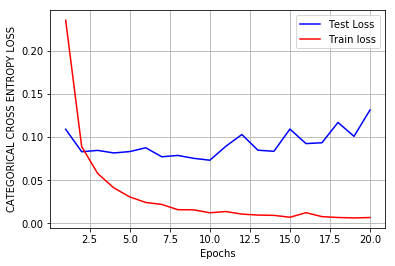

In [0]:
# Plot of loss vs epochs

score= model_1_1.evaluate(X_test, y_test)
print("Test SCore: ", score[0])
print("Test Accuracy: ", score[1])

fig, ax= plt.subplots(1,1)
ax.set_xlabel('Epochs'); ax.set_ylabel("CATEGORICAL CROSS ENTROPY LOSS")

x=list(range(1, n_epoch+1))
vy= m.history['val_loss']
ty= m.history['loss']

plot_dynamic(x,vy, ty, ax)

**Conclusion**
01. We can clearly see this is the case of overfitting thus regularization is required

# 2 Layer Architecture
**1.2 With Batch Normalization and Droupout (No regularization)**

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

In [0]:
model_1_2= Sequential()

model_1_2.add(Dense(hidden_1, input_dim=input_dim, activation='relu'))
model_1_2.add(BatchNormalization())
model_1_2.add(Dropout(0.5))

model_1_2.add(Dense(hidden_2, activation='relu'))
model_1_2.add(BatchNormalization())
model_1_2.add(Dropout(0.5))

model_1_2.add(Dense(output_dim, activation='softmax'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model_1_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
m = model_1_2.fit(X_train, y_train, batch_size= batch_size, epochs= n_epoch, validation_data= (X_test, y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.4273 - acc: 0.8707 - val_loss: 0.1424 - val_acc: 0.9568
Epoch 2/20
60000/60000 [==============================] - 7s 125us/step - loss: 0.2185 - acc: 0.9336 - val_loss: 0.1032 - val_acc: 0.9681
Epoch 3/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.1732 - acc: 0.9479 - val_loss: 0.0943 - val_acc: 0.9708
Epoch 4/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.1502 - acc: 0.9545 - val_loss: 0.0865 - val_acc: 0.9733
Epoch 5/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.1325 - acc: 0.9595 - val_loss: 0.0814 - val_acc: 0.9757
Epoch 6/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.1247 - acc: 0.9625 - val_loss: 0.0761 - val_acc: 0.9758
Epoch 7/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.1118 - acc: 0.9659 - val_loss: 0.0723 - 

10000/10000 [==============================] - 1s 55us/step
Test SCore:  0.05641758398373495
Test Accuracy:  0.9833


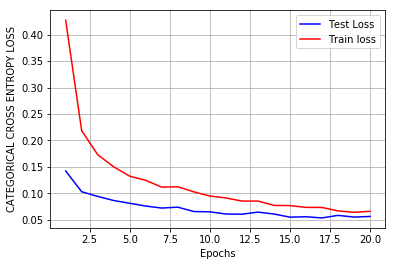

In [0]:
# Plot of loss vs epochs

score= model_1_2.evaluate(X_test, y_test)
print("Test SCore: ", score[0])
print("Test Accuracy: ", score[1])

fig, ax= plt.subplots(1,1)
ax.set_xlabel('Epochs'); ax.set_ylabel("CATEGORICAL CROSS ENTROPY LOSS")

x=list(range(1, n_epoch+1))
vy= m.history['val_loss']
ty= m.history['loss']

plot_dynamic(x,vy, ty, ax)

**Conclusion**
01. Improve in test accuracy
02. Much improved graph. No problem of overfiiting

# 2 Layer Architecture
**1.3 With Batch Normalization and Droupout (L2 regularization)**

In [0]:
from keras.regularizers import l2

In [0]:
model_1_3= Sequential()

model_1_3.add(Dense(hidden_1, input_dim=input_dim, kernel_regularizer=l2(0.01), activation='relu'))
model_1_3.add(BatchNormalization())
model_1_3.add(Dropout(0.5))

model_1_3.add(Dense(hidden_2, kernel_regularizer=l2(0.01), activation='relu'))
model_1_3.add(BatchNormalization())
model_1_3.add(Dropout(0.5))

model_1_3.add(Dense(output_dim, activation='softmax'))

In [0]:
model_1_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
m = model_1_3.fit(X_train, y_train, batch_size= batch_size, epochs= n_epoch, validation_data= (X_test, y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 153us/step - loss: 2.3112 - acc: 0.8656 - val_loss: 0.7340 - val_acc: 0.9238
Epoch 2/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.6524 - acc: 0.9137 - val_loss: 0.5025 - val_acc: 0.9400
Epoch 3/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.5798 - acc: 0.9139 - val_loss: 0.4357 - val_acc: 0.9529
Epoch 4/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.5492 - acc: 0.9143 - val_loss: 0.4167 - val_acc: 0.9487
Epoch 5/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.5272 - acc: 0.9165 - val_loss: 0.4102 - val_acc: 0.9477
Epoch 6/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.5193 - acc: 0.9148 - val_loss: 0.4160 - val_acc: 0.9425
Epoch 7/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.5100 - acc: 0.9131 - val_loss: 0.4038 - 

10000/10000 [==============================] - 1s 64us/step
Test SCore:  0.3434308669567108
Test Accuracy:  0.9533


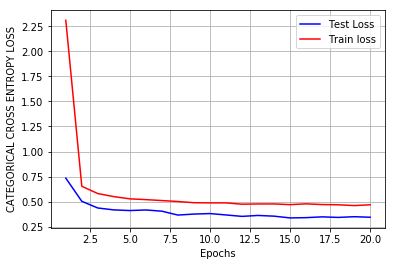

In [0]:
# Plot of loss vs epochs

score= model_1_3.evaluate(X_test, y_test)
print("Test SCore: ", score[0])
print("Test Accuracy: ", score[1])

fig, ax= plt.subplots(1,1)
ax.set_xlabel('Epochs'); ax.set_ylabel("CATEGORICAL CROSS ENTROPY LOSS")

x=list(range(1, n_epoch+1))
vy= m.history['val_loss']
ty= m.history['loss']

plot_dynamic(x,vy, ty, ax)

**Conclusion**
01. Accuracy reduced compared to previous model
02. Poor convergance

# 3 Layer Architecture
**2.1 Without Batch Normalization and Droupout (No regularization)**

In [0]:
# 3 hidden layers
# 784-512-256-32-10
# some model parameters

output_dim= 10
input_dim= 784
hidden_1= 512
hidden_2= 256
hidden_3= 32
batch_size= 100
n_epoch= 20

In [0]:
model_2_1= Sequential()
model_2_1.add(Dense(hidden_1, input_dim=input_dim, activation='relu'))
model_2_1.add(Dense(hidden_2, activation='relu'))
model_2_1.add(Dense(hidden_3, activation='relu'))
model_2_1.add(Dense(output_dim, activation='softmax'))

In [0]:
model_2_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
m = model_2_1.fit(X_train, y_train, batch_size= batch_size, epochs= n_epoch, validation_data= (X_test, y_test)) 



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 13s 213us/step - loss: 0.2271 - acc: 0.9327 - val_loss: 0.1110 - val_acc: 0.9650
Epoch 2/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.0861 - acc: 0.9741 - val_loss: 0.0858 - val_acc: 0.9762
Epoch 3/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.0568 - acc: 0.9826 - val_loss: 0.0889 - val_acc: 0.9735
Epoch 4/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.0422 - acc: 0.9865 - val_loss: 0.0731 - val_acc: 0.9780
Epoch 5/20
60000/60000 [==============================] - 11s 186us/step - loss: 0.0349 - acc: 0.9882 - val_loss: 0.0654 - val_acc: 0.9805
Epoch 6/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.0250 - acc: 0.9918 - val_loss: 0.0789 - val_acc: 0.9798
Epoch 7/20
6

10000/10000 [==============================] - 1s 93us/step
Test SCore:  0.09531402965732787
Test Accuracy:  0.9819


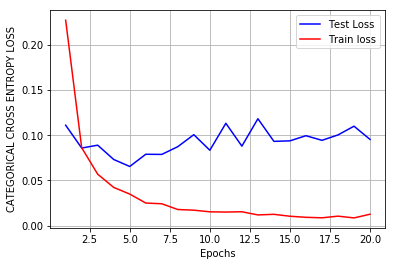

In [0]:
# Plot of loss vs epochs

score= model_2_1.evaluate(X_test, y_test)
print("Test SCore: ", score[0])
print("Test Accuracy: ", score[1])

fig, ax= plt.subplots(1,1)
ax.set_xlabel('Epochs'); ax.set_ylabel("CATEGORICAL CROSS ENTROPY LOSS")

x=list(range(1, n_epoch+1))
vy= m.history['val_loss']
ty= m.history['loss']

plot_dynamic(x,vy, ty, ax)

**Conclusion**
01. Clearly a case of overfitting

# 3 Layer Architecture
**2.2 With Batch Normalization and Droupout (No regularization)**

In [0]:
model_2_2= Sequential()

model_2_2.add(Dense(hidden_1, input_dim=input_dim, activation='relu'))
model_2_2.add(BatchNormalization())
model_2_2.add(Dropout(0.5))

model_2_2.add(Dense(hidden_2, activation='relu'))
model_2_2.add(BatchNormalization())
model_2_2.add(Dropout(0.5))

model_2_2.add(Dense(hidden_3, activation='relu'))
model_2_2.add(BatchNormalization())
model_2_2.add(Dropout(0.5))


model_2_2.add(Dense(output_dim, activation='softmax'))
model_2_2.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
____

In [0]:
model_2_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
m = model_2_2.fit(X_train, y_train, batch_size= batch_size, epochs= n_epoch, validation_data= (X_test, y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 234us/step - loss: 0.6355 - acc: 0.8142 - val_loss: 0.1648 - val_acc: 0.9484
Epoch 2/20
60000/60000 [==============================] - 13s 212us/step - loss: 0.2912 - acc: 0.9213 - val_loss: 0.1214 - val_acc: 0.9641
Epoch 3/20
60000/60000 [==============================] - 12s 208us/step - loss: 0.2302 - acc: 0.9385 - val_loss: 0.1040 - val_acc: 0.9701
Epoch 4/20
60000/60000 [==============================] - 12s 203us/step - loss: 0.1984 - acc: 0.9474 - val_loss: 0.0899 - val_acc: 0.9726
Epoch 5/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.1785 - acc: 0.9529 - val_loss: 0.0878 - val_acc: 0.9746
Epoch 6/20
60000/60000 [==============================] - 12s 203us/step - loss: 0.1648 - acc: 0.9552 - val_loss: 0.0861 - val_acc: 0.9751
Epoch 7/20
60000/60000 [==============================] - 13s 211us/step - loss: 0.1480 - acc: 0.9607 - val_loss: 0.

10000/10000 [==============================] - 1s 100us/step
Test SCore:  0.06579855370899895
Test Accuracy:  0.9833


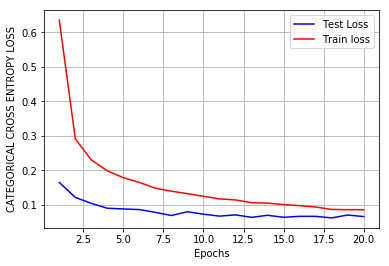

In [0]:
# Plot of loss vs epochs

score= model_2_2.evaluate(X_test, y_test)
print("Test SCore: ", score[0])
print("Test Accuracy: ", score[1])

fig, ax= plt.subplots(1,1)
ax.set_xlabel('Epochs'); ax.set_ylabel("CATEGORICAL CROSS ENTROPY LOSS")

x=list(range(1, n_epoch+1))
vy= m.history['val_loss']
ty= m.history['loss']

plot_dynamic(x,vy, ty, ax)

**Conclusion**
01. Same acciracy with 2 layer model.
02. No overfitting, better graph.
03. But no greater advantage of using 3 layer

# 3 Layer Architecture
**2.3 With Batch Normalization and Droupout (with regularization)**

In [0]:
model_2_3= Sequential()

model_2_3.add(Dense(hidden_1, input_dim=input_dim, kernel_regularizer=l2(0.001), activation='relu'))
model_2_3.add(BatchNormalization())
model_2_3.add(Dropout(0.5))

model_2_3.add(Dense(hidden_2, kernel_regularizer=l2(0.001), activation='relu'))
model_2_3.add(BatchNormalization())
model_2_3.add(Dropout(0.5))

model_2_3.add(Dense(hidden_3, kernel_regularizer=l2(0.001), activation='relu'))
model_2_3.add(BatchNormalization())
model_2_3.add(Dropout(0.5))


model_2_3.add(Dense(output_dim, activation='softmax'))
model_2_3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)               

In [0]:
model_2_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
m = model_2_3.fit(X_train, y_train, batch_size= batch_size, epochs= n_epoch, validation_data= (X_test, y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 255us/step - loss: 1.3089 - acc: 0.8170 - val_loss: 0.6908 - val_acc: 0.9483
Epoch 2/20
60000/60000 [==============================] - 15s 244us/step - loss: 0.7307 - acc: 0.9200 - val_loss: 0.4952 - val_acc: 0.9600
Epoch 3/20
60000/60000 [==============================] - 15s 246us/step - loss: 0.5783 - acc: 0.9325 - val_loss: 0.4082 - val_acc: 0.9645
Epoch 4/20
60000/60000 [==============================] - 14s 239us/step - loss: 0.5031 - acc: 0.9374 - val_loss: 0.3675 - val_acc: 0.9648
Epoch 5/20
60000/60000 [==============================] - 15s 245us/step - loss: 0.4651 - acc: 0.9402 - val_loss: 0.3415 - val_acc: 0.9670
Epoch 6/20
60000/60000 [==============================] - 15s 249us/step - loss: 0.4535 - acc: 0.9394 - val_loss: 0.3366 - val_acc: 0.9659
Epoch 7/20
60000/60000 [==============================] - 15s 255us/step - loss: 0.4404 - acc: 0.9411 - val_loss: 0.

10000/10000 [==============================] - 1s 124us/step
Test SCore:  0.2738086731672287
Test Accuracy:  0.9708


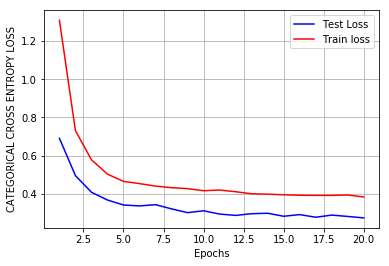

In [0]:
# Plot of loss vs epochs

score= model_2_3.evaluate(X_test, y_test)
print("Test SCore: ", score[0])
print("Test Accuracy: ", score[1])

fig, ax= plt.subplots(1,1)
ax.set_xlabel('Epochs'); ax.set_ylabel("CATEGORICAL CROSS ENTROPY LOSS")

x=list(range(1, n_epoch+1))
vy= m.history['val_loss']
ty= m.history['loss']

plot_dynamic(x,vy, ty, ax)

**Conclusion**
01. Less accuracy and poor convergence in graph

# 5 Layer Architecture
**3.1 Without Batch Normalization and Droupout (No regularization)**

In [0]:
# 5 hidden layers
# 784-512-256-128-64-32-10
# some model parameters

output_dim= 10
input_dim= 784
hidden_1= 512
hidden_2= 256
hidden_3= 128
hidden_4= 64
hidden_5= 32
batch_size= 200
n_epoch= 20

In [0]:
model_3_1= Sequential()
model_3_1.add(Dense(hidden_1, input_dim=input_dim, activation='relu'))
model_3_1.add(Dense(hidden_2, activation='relu'))
model_3_1.add(Dense(hidden_3, activation='relu'))
model_3_1.add(Dense(hidden_4, activation='relu'))
model_3_1.add(Dense(hidden_5, activation='relu'))
model_3_1.add(Dense(output_dim, activation='softmax'))

In [0]:
model_3_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
m = model_3_1.fit(X_train, y_train, batch_size= batch_size, epochs= n_epoch, validation_data= (X_test, y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.3018 - acc: 0.9085 - val_loss: 0.1561 - val_acc: 0.9535
Epoch 2/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.1046 - acc: 0.9684 - val_loss: 0.0886 - val_acc: 0.9731
Epoch 3/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.0697 - acc: 0.9788 - val_loss: 0.0818 - val_acc: 0.9749
Epoch 4/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.0490 - acc: 0.9846 - val_loss: 0.0964 - val_acc: 0.9705
Epoch 5/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.0357 - acc: 0.9885 - val_loss: 0.0736 - val_acc: 0.9778
Epoch 6/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.0275 - acc: 0.9911 - val_loss: 0.0793 - val_acc: 0.9786
Epoch 7/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.0252 - acc: 0.9918 - val_loss: 0.0743 - 

10000/10000 [==============================] - 2s 213us/step
Test SCore:  0.11195847964408749
Test Accuracy:  0.9775


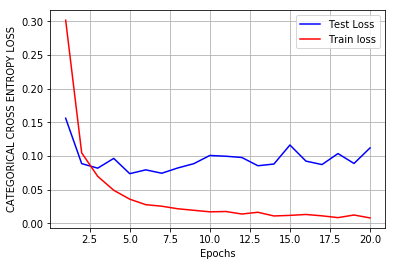

In [0]:
# Plot of loss vs epochs

score= model_3_1.evaluate(X_test, y_test)
print("Test SCore: ", score[0])
print("Test Accuracy: ", score[1])

fig, ax= plt.subplots(1,1)
ax.set_xlabel('Epochs'); ax.set_ylabel("CATEGORICAL CROSS ENTROPY LOSS")

x=list(range(1, n_epoch+1))
vy= m.history['val_loss']
ty= m.history['loss']

plot_dynamic(x,vy, ty, ax)

**Conclusion**
01. Again without batch normalization and regularization we see overfitting.
02. So we can conclude that batch normalization or regularization is required 
    to avoide overfiiting

# 5 Layer Architecture
**3.2 With Batch Normalization and Droupout (No regularization)**

In [0]:
model_3_2= Sequential()

model_3_2.add(Dense(hidden_1, input_dim=input_dim, activation='relu'))
model_3_2.add(BatchNormalization())
model_3_2.add(Dropout(0.5))

model_3_2.add(Dense(hidden_2, activation='relu'))
model_3_2.add(BatchNormalization())
model_3_2.add(Dropout(0.5))

model_3_2.add(Dense(hidden_3, activation='relu'))
model_3_2.add(BatchNormalization())
model_3_2.add(Dropout(0.5))

model_3_2.add(Dense(hidden_4, activation='relu'))
model_3_2.add(BatchNormalization())
model_3_2.add(Dropout(0.5))


model_3_2.add(Dense(hidden_5, activation='relu'))
model_3_2.add(BatchNormalization())
model_3_2.add(Dropout(0.5))


model_3_2.add(Dense(output_dim, activation='softmax'))
model_3_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)              

In [0]:
model_3_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
m = model_3_2.fit(X_train, y_train, batch_size= batch_size, epochs= n_epoch, validation_data= (X_test, y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 215us/step - loss: 1.5280 - acc: 0.5047 - val_loss: 0.3700 - val_acc: 0.8999
Epoch 2/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.6323 - acc: 0.8190 - val_loss: 0.2213 - val_acc: 0.9398
Epoch 3/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.4141 - acc: 0.8932 - val_loss: 0.1755 - val_acc: 0.9579
Epoch 4/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.3277 - acc: 0.9192 - val_loss: 0.1453 - val_acc: 0.9636
Epoch 5/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.2786 - acc: 0.9334 - val_loss: 0.1385 - val_acc: 0.9660
Epoch 6/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.2499 - acc: 0.9404 - val_loss: 0.1236 - val_acc: 0.9686
Epoch 7/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.2281 - acc: 0.9476 - val_loss: 0.

10000/10000 [==============================] - 2s 245us/step
Test SCore:  0.08184210508980323
Test Accuracy:  0.981


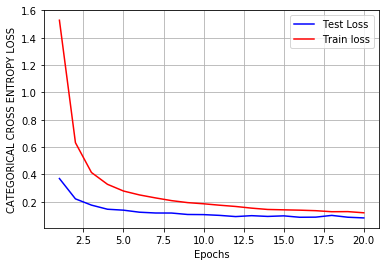

In [0]:
# Plot of loss vs epochs

score= model_3_2.evaluate(X_test, y_test)
print("Test SCore: ", score[0])
print("Test Accuracy: ", score[1])

fig, ax= plt.subplots(1,1)
ax.set_xlabel('Epochs'); ax.set_ylabel("CATEGORICAL CROSS ENTROPY LOSS")

x=list(range(1, n_epoch+1))
vy= m.history['val_loss']
ty= m.history['loss']

plot_dynamic(x,vy, ty, ax)

**Conclusion**
01. Almost same accuracy as 2 layer and 3 layer model.
02. Better graph and no problem of overfitting.
03. Still not worth using 5 layer.

# 5 Layer Architecture
**3.3 Without Batch Normalization and Droupout (with regularization)**

In [0]:
# In this model we are not going to use batch normalization and droupout but we are using l2 regularization.

model_3_3= Sequential()
model_3_3.add(Dense(hidden_1, input_dim=input_dim, kernel_regularizer=l2(0.01), activation='relu'))
model_3_3.add(Dense(hidden_2, kernel_regularizer=l2(0.01), activation='relu'))
model_3_3.add(Dense(hidden_3, kernel_regularizer=l2(0.01), activation='relu'))
model_3_3.add(Dense(hidden_4, kernel_regularizer=l2(0.01), activation='relu'))
model_3_3.add(Dense(hidden_5, kernel_regularizer=l2(0.01), activation='relu'))
model_3_3.add(Dense(output_dim, activation='softmax'))

In [0]:
model_3_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
m = model_3_3.fit(X_train, y_train, batch_size= batch_size, epochs= n_epoch, validation_data= (X_test, y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 173us/step - loss: 2.8677 - acc: 0.8508 - val_loss: 1.2722 - val_acc: 0.8775
Epoch 2/20
60000/60000 [==============================] - 8s 138us/step - loss: 1.0649 - acc: 0.9106 - val_loss: 0.9411 - val_acc: 0.9223
Epoch 3/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.8804 - acc: 0.9224 - val_loss: 0.8168 - val_acc: 0.9320
Epoch 4/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.7920 - acc: 0.9307 - val_loss: 0.7410 - val_acc: 0.9373
Epoch 5/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.7418 - acc: 0.9336 - val_loss: 0.7119 - val_acc: 0.9356
Epoch 6/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.7038 - acc: 0.9360 - val_loss: 0.6897 - val_acc: 0.9366
Epoch 7/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.6709 - acc: 0.9390 - val_loss: 0.6501 -

10000/10000 [==============================] - 1s 125us/step
Test SCore:  0.5152274724006652
Test Accuracy:  0.9477


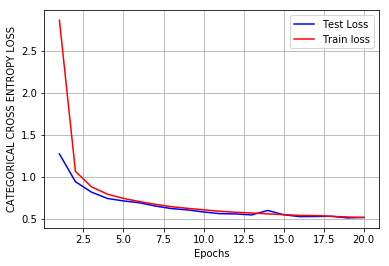

In [0]:
# Plot of loss vs epochs

score= model_3_3.evaluate(X_test, y_test)
print("Test SCore: ", score[0])
print("Test Accuracy: ", score[1])

fig, ax= plt.subplots(1,1)
ax.set_xlabel('Epochs'); ax.set_ylabel("CATEGORICAL CROSS ENTROPY LOSS")

x=list(range(1, n_epoch+1))
vy= m.history['val_loss']
ty= m.history['loss']

plot_dynamic(x,vy, ty, ax)

**Conclusion**
01. Best graph till now.
02. Low accuracy than previous models 

# Overall Conclusion and best model

**01. We have observed that without batch normalization, dropout or                   regularization model gets overfitted. So these are neccessary**

**02. By increasing the layers we didn't observe much changes in the accuracy and loss.**

**03. Thus it is better to use a 2 layer achitecture**

**Best Model:-**

01. Keeping in mind all the above mentioned cases the best model is **Model 1.2**
02. That is 2 layer achitecture with batch normalization and dropout.
03. Input layer(784)-- Hidden layer 1(350)-- hidden layer 2(150)-- Output layer(10) 